        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Individual Project - Fall 2020</h1>

You need to work on a popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. You can use all different models that you learned about them in this course for yourr work. Keep in mind that this is a project, not a class assignmnet. So, not all steps are predetermined and you have more flexibility, and the final outcome is likely to be more detailed.

In order to load the dataset you need to have `tensorflow V2` on your computer. Use the following code to install the package

In [127]:
!pip install --upgrade tensorflow

Requirement already up-to-date: tensorflow in /opt/anaconda3/lib/python3.7/site-packages (2.3.1)


You can also check the version of it using the following code.

In [128]:
import tensorflow as tf
tf.__version__

'2.3.1'

Now, it's time to load the dataset

In [129]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [130]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

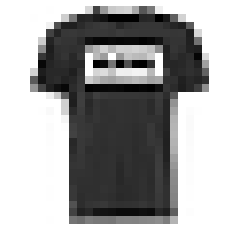

In [131]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [132]:
y_train[1]

0

The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [133]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[1]])

T-shirt/top


Now, it's your turn,

<ul>
    <li><b>Task1:</b> Use the train set to train various supervised models and evaluate their performance using the test set.</li>
    <ul>
        <li>Use different supervised learning models.</li>
        <li>Use different metrics such as <b>accutacy</b>, <b>precision</b>, <b>AUC</b>, and ... in your model evaluation. </li>
        <li>It is not enough to report the metrics. It is crucial that you interpret the metrics for each model and compare them across different models.</li>
        <li> You may need to use the cross validation methods for hyperparameter selection.</li>
        <li> Specify the model that outperforms the other models.</b>
    </ul>
    <li><b>Task2:</b> Use the best model to predict your own fashion pieces.</li>
    <ul>
        <li>Take a picture of five fashion pieces of your own (take pictures in square format).</li>
        <li>Resize images to the correct size (28,28).</li>
        <li>Grayscale your images.</li>
        <li>Visualize all the images side by side</li>
        <li>Use the best model in Task 1 to predict the label of each of your own images.</li>
        <li>How accurate is the final result?</li>
    </ul>
</ul>

In [134]:
X_test.shape

(10000, 28, 28)

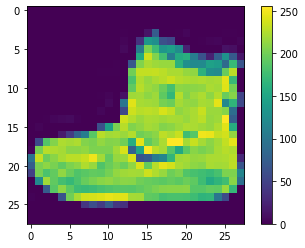

In [135]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [136]:
x_train=X_train.reshape(60000,28*28)           #Reshaping test and training dataset
x_test=X_test.reshape(10000,28*28)
print(x_train.shape,x_test.shape) 

(60000, 784) (10000, 784)


In [137]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logisticR = LogisticRegression(solver='lbfgs')                 
logisticR.fit(x_train, y_train)                     
y_logisticR_hat = logisticR.predict(x_test)
accuracyLogistic= accuracy_score(y_test,y_logisticR_hat, normalize = True) * 100 
print("Logistic Regression accuracy score is: ", accuracyLogistic)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

Logistic Regression accuracy score is:  83.8


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [138]:
from sklearn.metrics import classification_report
logisticRclassification= classification_report(y_test,y_logisticR_hat)  #Generating classification report
print("Classification report: ", logisticRclassification) 

Classification report:                precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.96      0.95      0.96      1000
           2       0.72      0.73      0.72      1000
           3       0.83      0.86      0.84      1000
           4       0.70      0.78      0.74      1000
           5       0.95      0.89      0.92      1000
           6       0.65      0.53      0.58      1000
           7       0.90      0.94      0.92      1000
           8       0.91      0.95      0.93      1000
           9       0.93      0.94      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Logisitc Regression model has an accuracy of 84% for our dataset. The f1- score ranges ranges from 0.58 to 0.96 and the model displays high precision and recall values.

In [143]:
#Naive Bayes model
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB 
Naive_model = GaussianNB()
Naive_model.fit(x_train, y_train)
ytestNaive = Naive_model.predict(x_test)
accuracyNaive= accuracy_score(y_test,ytestNaive, normalize = True) * 100 
print("Naive accuracy score is: ", accuracyNaive)
Naiveclassification= classification_report(y_test,ytestNaive) 
print("Classification report: ", Naiveclassification)

Naive accuracy score is:  58.56
Classification report:                precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



Naive Bayes model has a poor accuracy of just 58.6%. Usually, Naive bayes model is fast, efficient and easy to implement for large datasets but it shows poor perfomance. This model has a low f1-score and the preciiosn and recall scores as relatively very low.

In [146]:
#KNN Model
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
KNN_model = KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(x_train, y_train)
y_knn_hat = KNN_model.predict(x_test)
accuracyKNN= accuracy_score(y_test,y_knn_hat, normalize = True) * 100 
print("KNN accuracy score is: ", accuracyKNN)

KNN accuracy score is:  84.61999999999999


In [147]:
from sklearn.metrics import classification_report
KNNclassification= classification_report(y_test,y_knn_hat)  #Write explanation for this along with comments
print("Classification report: ", KNNclassification) 

Classification report:                precision    recall  f1-score   support

           0       0.78      0.86      0.82      1000
           1       0.99      0.96      0.97      1000
           2       0.72      0.80      0.76      1000
           3       0.90      0.87      0.88      1000
           4       0.78      0.76      0.77      1000
           5       1.00      0.78      0.87      1000
           6       0.63      0.57      0.60      1000
           7       0.85      0.95      0.90      1000
           8       0.97      0.94      0.95      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



KNN model has a good accuracy score of 85%. The f1- scores for the model are pretty high comapred to Naive Bayes and Logistic Regression model. 

In [150]:
#Decision Tree Classisfier model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
DTmodel = DecisionTreeClassifier()
DTmodel.fit(x_train, y_train)
y_train_DT  = DTmodel.predict(x_train)
y_test_DT  = DTmodel.predict(x_test)

in_sample_acc = accuracy_score(y_train,y_train_DT, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_DT, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)                    # Checking in-sample and out-of-sample accuracy
print("Out-of-sample Accuracy: ", out_of_sample_acc)

DTmodel = DecisionTreeClassifier()
param_grid = {'max_depth': [5,6,7,8,9,10]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid_DT = GridSearchCV(DTmodel, param_grid, cv = cv, 
                    return_train_score=True, scoring='accuracy')
grid_DT.fit(x_train, y_train)

print("Best Parameter: {}".format(grid_DT.best_params_))
print("Best Cross Validation Score: {}".format(grid_DT.best_score_))

bestModel = grid_DT.best_estimator_
y_train_DT  = bestModel.predict(x_train)
y_test_DT  = bestModel.predict(x_test)
in_sample_acc = accuracy_score(y_train,y_train_DT, normalize = True) * 100
out_of_sample_acc = accuracy_score(y_test,y_test_DT, normalize = True) * 100
print("In-sample Accuracy: ", in_sample_acc)
print("Out-of-sample Accuracy: ", out_of_sample_acc)
DTclassification=classification_report(y_test,y_test_DT)
print(DTclassification)

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  78.75
Best Parameter: {'max_depth': 10}
Best Cross Vlidation Score: 0.8087833333333333
In-sample Accuracy:  85.15
Out-of-sample Accuracy:  80.15
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1000
           1       0.98      0.93      0.95      1000
           2       0.65      0.67      0.66      1000
           3       0.82      0.81      0.81      1000
           4       0.60      0.73      0.66      1000
           5       0.93      0.87      0.90      1000
           6       0.57      0.50      0.53      1000
           7       0.87      0.93      0.90      1000
           8       0.93      0.90      0.91      1000
           9       0.91      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.81      0.80      0.80     10000
weighted avg       0.81      0.80      0.80     10000



Decision Tree Classifier chooses 10 as the best maximum depth for the MNIST dataset. It exhibits low variance since In - sample accuracy and Out - of - sample accuracy are pretty close. In -sample accuracy is 85% whereas Out- of - sample accruacy is 80%. The f1 - scores for the model with max_depth = 10 ranges from 0.53 to 0.95. The precision and recall values are not too high. 

In [152]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model_rnclass = RandomForestClassifier(n_estimators=100, random_state=0)
model_rnclass.fit(x_train,y_train)

y_train_hat_rnclass = model_rnclass.predict(x_train)
y_test_hat_rnclass = model_rnclass.predict(x_test)
in_sample_acc_rnclass = accuracy_score(y_train,y_train_hat_rnclass, normalize = True) * 100
out_of_sample_acc_rnclass = accuracy_score(y_test,y_test_hat_rnclass, normalize = True) *100
print("In-sample Accuracy: ", in_sample_acc_rnclass )        # Checking in-sample and out-of-sample accuracy
print("Out-of-sample Accuracy: ",out_of_sample_acc_rnclass)

from sklearn.metrics import classification_report
rnclass=classification_report(y_test,y_test_hat_rnclass)
print('classification_report',rnclass)

In-sample Accuracy:  100.0
Out-of-sample Accuracy:  87.74
classification_report               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.77      0.81      0.79      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.60      0.65      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



The Random Forest model shows high variance between in- sample and out- of - smaple data of approximately 13%. The range of f1- scores are high along with all precision and recall values above 0.5 (Threshold value)

## Among these Supervised learning models, KNN model displays a high level of accuracy (85%) and few precision values reaches 1. It is the best model according to my findings

In [ ]:
#Task 2

In [79]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


(1, 784)


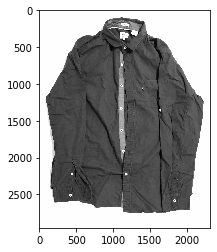

(1, 784)


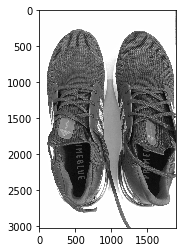

(1, 784)


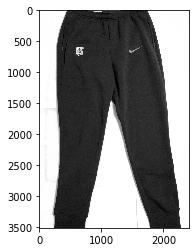

(1, 784)


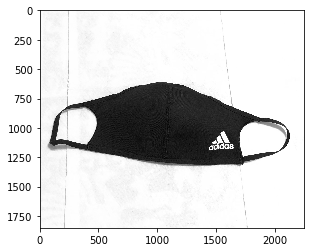

(1, 784)


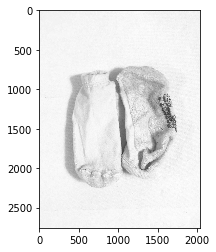

In [163]:
import matplotlib.image as mplib 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import color
from skimage import io

shirt = mplib.imread('Shirt.png')          #Reading the images of my test data
shoe = mplib.imread('Shoe.png')
pant = mplib.imread('Pant.png')
mask = mplib.imread('Mask.png')
socks = mplib.imread('Socks.png')


def rgb2gray(rgb):                        #Using rgb2gray function to convert into Grayscale images
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img1=shirt.copy()                 #Reshaping into 28*28 size and visualizing it
img1.resize(1,28*28)
print(img1.shape)
gray = rgb2gray(shirt)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.savefig('finalshirt.png')
plt.show()



img2=shoe.copy()                 #Reshaping into 28*28 size and visualizing it
img2.resize(1,28*28)
print(img2.shape)
gray = rgb2gray(shoe)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.savefig('finalshoe.png')
plt.show()


img3=pant.copy()                #Reshaping into 28*28 size and visualizing it
img3.resize(1,28*28)
print(img3.shape)
gray = rgb2gray(pant)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.savefig('finalpant.png')
plt.show()

img4=mask.copy()                #Reshaping into 28*28 size and visualizing it
img4.resize(1,28*28)
print(img4.shape)
gray = rgb2gray(mask)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.savefig('finalmask.png')
plt.show()


img5=socks.copy()               #Reshaping into 28*28 size and visualizing it
img5.resize(1,28*28)
print(img5.shape)
gray = rgb2gray(socks)    
plt.imshow(gray, cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
plt.savefig('finalsocks.png')
plt.show()

In [164]:
print(img1.shape)

(1, 784)


In [175]:
listimage=[]
listimage.append(img1)             #Creating a new empty list and appending the grayscale images
listimage.append(img2)
listimage.append(img3)
listimage.append(img4)
listimage.append(img5)

In [166]:
print(len(listimage))              #Finding the length of the appended list

5


In [186]:
newarray=np.array(listimage)       #Converting the list into array using NumPy function
newarray.shape

(5, 1, 784)

In [187]:
print(newarray[1].shape)

(1, 784)


In [188]:
newarray=newarray.reshape(5,28*28)       #Reshaping the new array
print(newarray.shape)

(5, 784)


In [189]:
newarray = newarray.astype('float32')    #Converting new array from string to float type
newarray /=255.0


In [ ]:
from sklearn.decomposition import PCA
newpca= PCA.transform(newarray)           #Transformation using PCA. 
newpca.shape

In [192]:
#Using all the above models to implement and find the labels
Logisticmodel=logisticR.predict(newarray)
print(Logisticmodel)

NaiveBayesmodel= Naive_model.predict(newarray)
print(NaiveBayesmodel)

KNNModel= KNN_model.predict(newarray)
print(KNNModel)

DecisionTreeModel=bestModel.predict(newarray)
print(DecisionTreeModel)

RandomForestModel=model_rnclass.predict(newarray)
print(RandomForestModel)

[5 5 5 5 5]
[7 7 7 7 7]
[6 6 6 6 6]
[5 5 5 5 5]
[5 5 5 5 5]


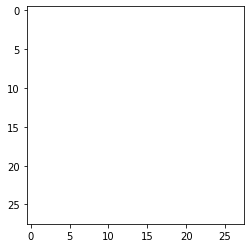

The class name is Shirt


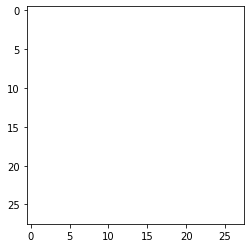

The class name is Shirt


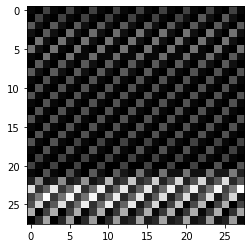

The class name is Shirt


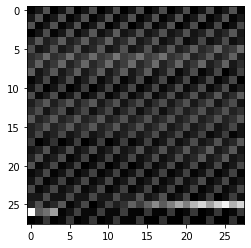

The class name is Shirt


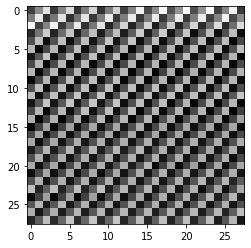

The class name is Shirt


In [195]:
i=0
for i in range(5): 
    arraynew=newarray[i]
    arraynew_dimesnion=arraynew.reshape(28,28)        #Creating a new array and reshaping it
    plt.imshow(arraynew_dimesnion,cmap='binary')
    plt.show()
    newclass=KNNModel[i]                             #Applying the best model (KNN) to my test data.
    print('The class name is', class_names[newclass])
    i=i+1

## After applying KNN Model to my test data, I find that accuracy results of the model are not great for test data since it predicts only 2 objects from the class accurately out of 5. 

### Output

<ul>
    <li>Make sure to put descriptive comments on your code</li>
    <li>Use the markdown cell format in Jupiter to add your own interpretation to the result in each section.</li>
    <li>Make sure to keep the output of your runs when you want to save the final version of the file.</li>
    <li>The final work should be very well structured and should have a consistent flow of analysis.</li>
</ul>

#### Due Date: Nov 9 2020 at 11:59 PM

## Grading Criteria

<table style="width:400px;height:200px;border:1px black solid; background-color:white">
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Comprehensiveness</th>
        <td style="text-align:center;border:1px black solid"><b>30%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Correctness</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Complete Report</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Clear Code</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:left;border:1px black solid">Innovation (Extra)</th>
        <td style="text-align:center;border:1px black solid"><b>20%</b></td>
    </tr>
    <tr style="background-color:white">
        <th style="text-align:center;border:1px black solid;color:red"><u>Total</u></th>
        <td style="text-align:center;border:1px black solid;color:red"><b stlyle="color:red">110%</b></td>
    </tr>
</table>